Optimal number of neighbors: 7
Mean Absolute Error (MAE): 82.05
R² Score: 0.90


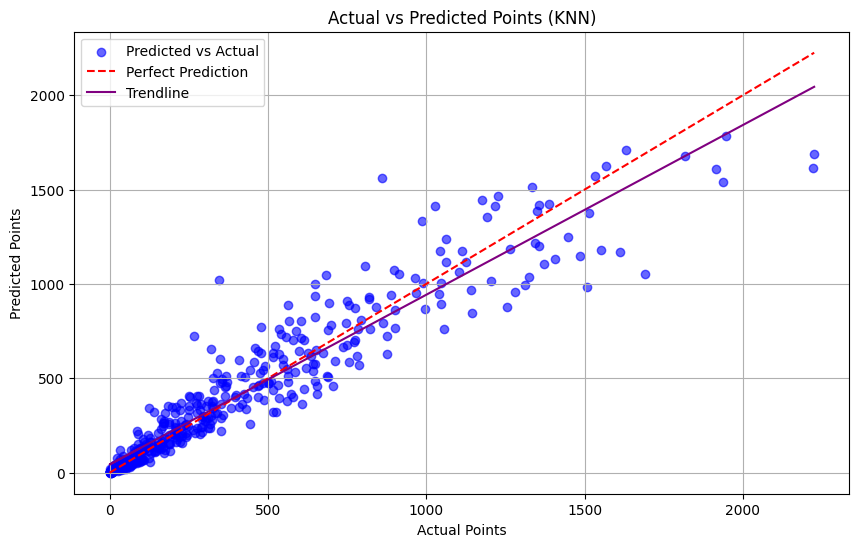

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

file_path = 'all_nba_playerstats_2021-2025.csv'
player_stats_df = pd.read_csv(file_path)

target_column = 'PTS'
feature_columns = ['MIN', 'AST', 'REB', 'TOV', 'STL', 'BLK', 'PF', 'PLUS/MINUS']

player_stats_df = player_stats_df.dropna(subset=feature_columns + [target_column])

X = player_stats_df[feature_columns]
y = player_stats_df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train_scaled, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f"Optimal number of neighbors: {best_k}")

knn_model = KNeighborsRegressor(n_neighbors=best_k)
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='green', label='Trendline')

plt.title('Actual vs Predicted Points (KNN)')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.legend()
plt.grid(True)
plt.show()


c:\Users\USER\OneDrive\Documents\Binus\Year 2\Fundamental Of Data Science\Code\Project\.venv\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
c:\Users\USER\OneDrive\Documents\Binus\Year 2\Fundamental Of Data Science\Code\Project\.venv\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
c:\Users\USER\OneDrive\Documents\Binus\Year 2\Fundamental Of Data Science\Code\Project\.venv\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
c:\Users\USER\OneDrive\Documents\Binus\Year 2\Fundamental Of Data Science\Code\Project\.venv\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  war

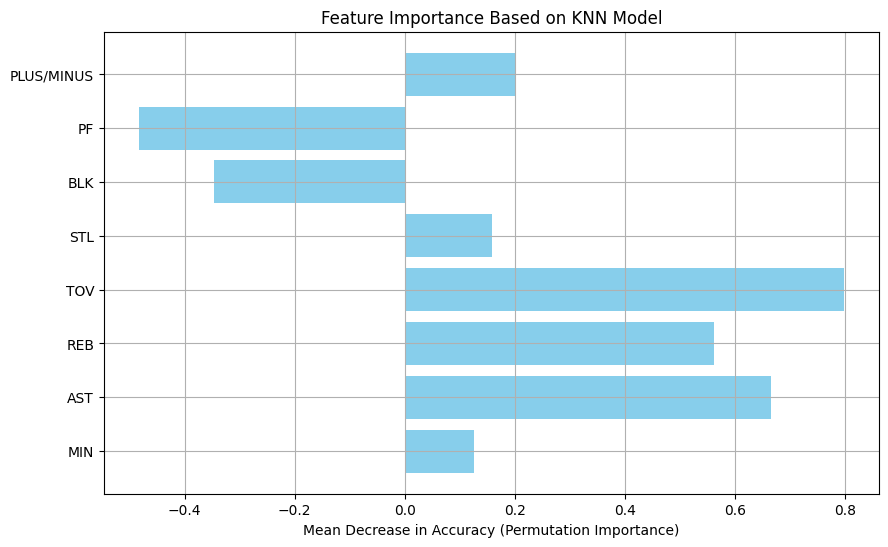

In [2]:
from sklearn.inspection import permutation_importance

# Calculate feature importance using permutation importance
result = permutation_importance(knn_model, X_test, y_test, n_repeats=10, random_state=42)

# Extract importance values for each feature
importances = result.importances_mean
features = X.columns

# Create a bar chart for feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Mean Decrease in Accuracy (Permutation Importance)')
plt.title('Feature Importance Based on KNN Model')
plt.grid(True)
plt.show()


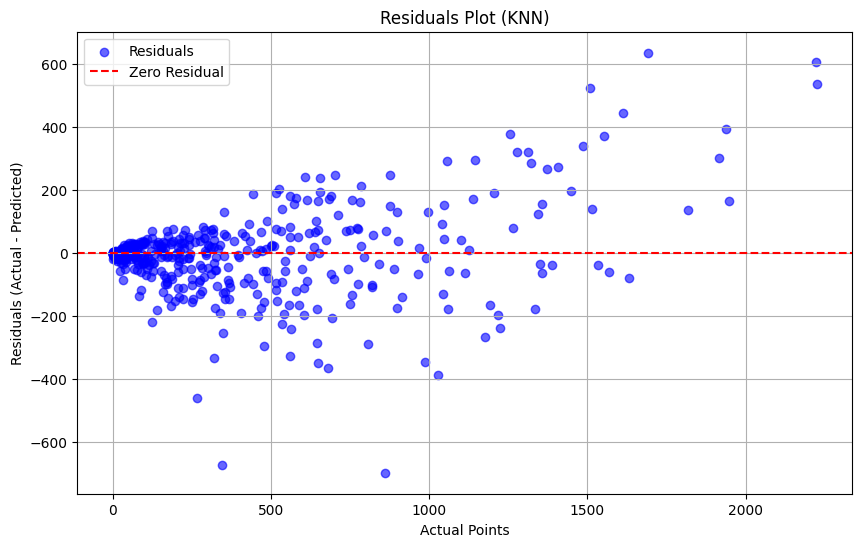

In [3]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.6, color='blue', label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Residual')
plt.title('Residuals Plot (KNN)')
plt.xlabel('Actual Points')
plt.ylabel('Residuals (Actual - Predicted)')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
import statsmodels.api as sm

X = player_stats_df[feature_columns]
y = player_stats_df[target_column]

X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()


print(results.summary())

p_values = results.pvalues[1:]  
for feature, p_value in zip(feature_columns, p_values):
    print(f"Feature: {feature}, P-value: {p_value}")


                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     3928.
Date:                Mon, 16 Dec 2024   Prob (F-statistic):               0.00
Time:                        09:04:39   Log-Likelihood:                -13709.
No. Observations:                2218   AIC:                         2.744e+04
Df Residuals:                    2209   BIC:                         2.749e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.4815      3.869     -5.035      0.0

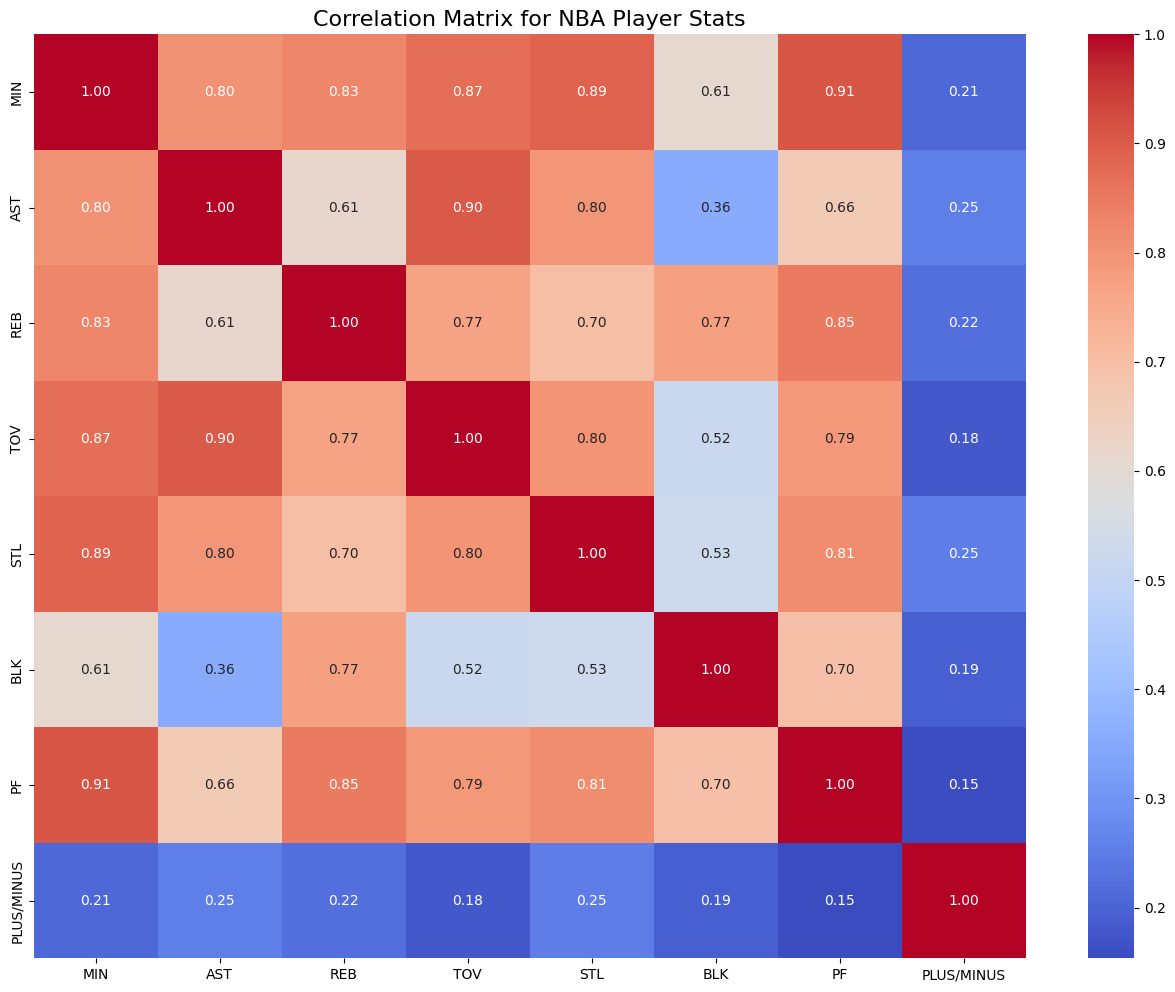

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
file_path = 'all_nba_playerstats_2021-2025.csv'  # Replace with your file path
player_stats_df = pd.read_csv(file_path)

# Select the relevant columns for correlation analysis
features = ['MIN', 'AST', 'REB', 'TOV', 'STL', 'BLK', 'PF', 'PLUS/MINUS']

# Drop rows with missing values
player_stats_df = player_stats_df.dropna(subset=features)

# Calculate the correlation matrix
correlation_matrix = player_stats_df[features].corr()

# Plotting the correlation matrix with a larger figure size
plt.figure(figsize=(16, 12))  # Increase the width and height
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for NBA Player Stats", fontsize=16)  # Adjust title size for better readability
plt.show()
